In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs

In [2]:
time_series = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_ts.csv')


In [4]:
time_series['date'] = pd.to_datetime(time_series['date'])

# Extract years from the 'date' column
years = time_series['date'].dt.year

In [24]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

In [15]:
time_series

,date,displacement (mm)
0,2014-10-08,0.00
1,2015-02-05,25.95
2,2015-03-13,30.79
3,2015-04-30,32.57
4,2015-05-24,3.40
...,...,...
207,2024-01-25,200.49
208,2024-02-06,186.21
209,2024-02-18,189.37
210,2024-03-01,191.67


Text(0.5, 1.0, 'Displacement Over Time')

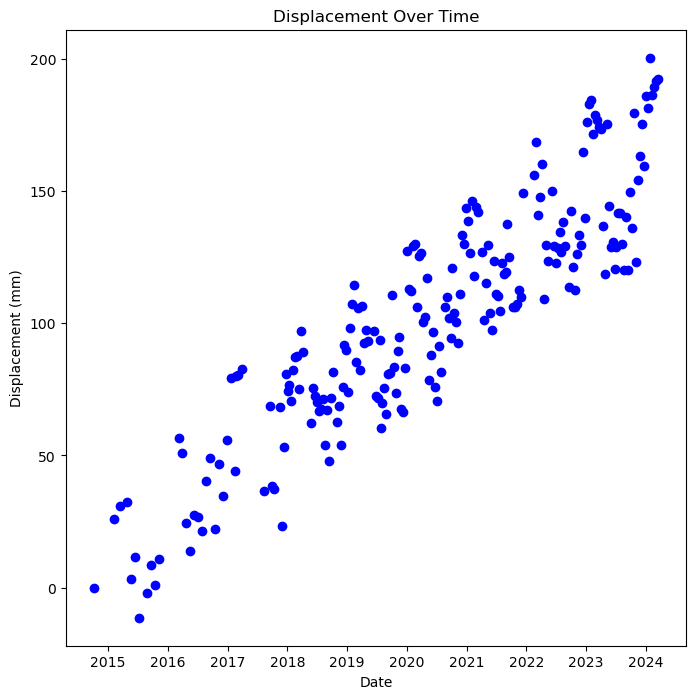

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ts = ax.scatter(time_series['date'], time_series["displacement (mm)"], color='b')
plt.xticks(year, labels=year)
plt.xlabel('Date')
plt.ylabel('Displacement (mm)')
plt.title('Displacement Over Time')



In [31]:
profile = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_profile.csv')

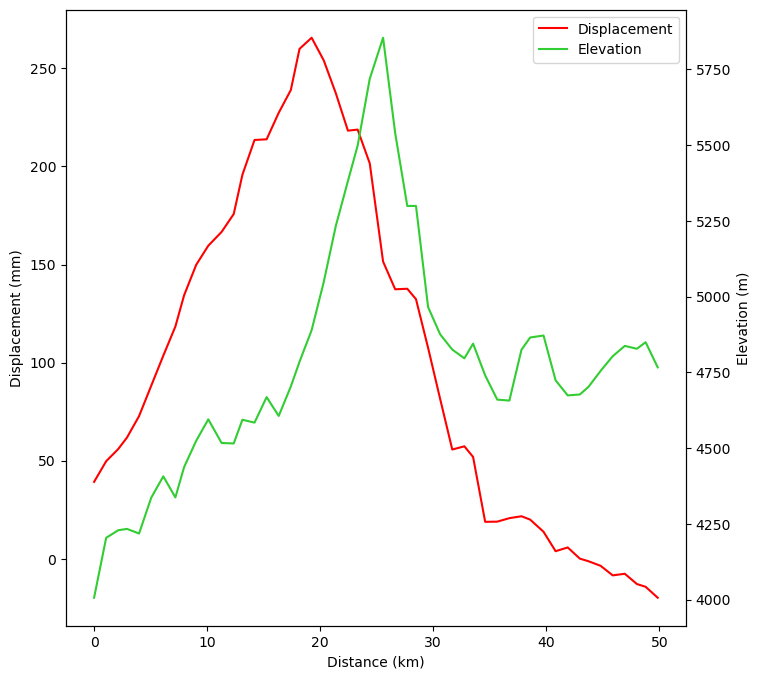

In [52]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.plot(profile['distance (km)'], profile["displacement (mm)"], label='Displacement', color='r')
plt.xlabel('Distance (km)')
plt.ylabel('Displacement (mm)')
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Elevation (m)')
ax2.plot(profile['distance (km)'], profile["elevation (m)"], label='Elevation', color='limegreen')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

In [5]:
surface_plot = pd.read_csv('../data/sabancaya_047A_10580_131313_x100_disp_raw.csv')

In [43]:
long = surface_plot['longitude']
lat = surface_plot['latitude']

deformation_data = surface_plot.dropna(subset=['displacement (mm)'])

In [51]:
deformation_data

,latitude,longitude,displacement (mm),coherence,elevation (m)
0,-16.036,-72.106,-57.70,0.54,3361.58
1,-16.036,-72.101,-55.08,0.51,3464.37
2,-16.036,-72.096,-54.80,0.57,3425.61
3,-16.036,-72.091,-52.53,0.60,3483.95
4,-16.036,-72.086,-52.52,0.55,3498.88
...,...,...,...,...,...
9995,-15.538,-71.628,-10.08,0.67,4712.00
9996,-15.538,-71.623,-18.11,0.55,4623.83
9997,-15.538,-71.618,-11.32,0.74,4380.73
9998,-15.538,-71.613,-9.67,0.74,4451.78


C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1696: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  result = super().scatter(*args, **kwargs)
C:\Users\14027\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid v

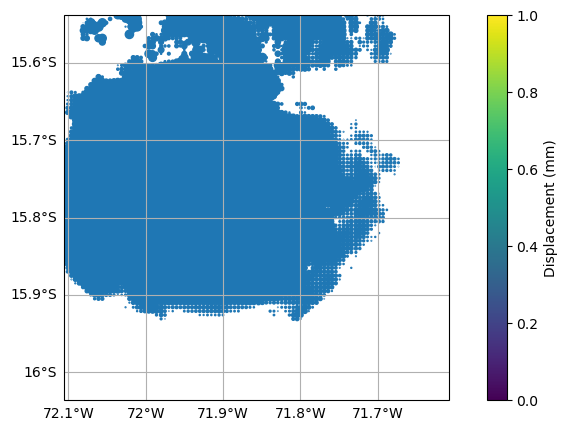

In [60]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
vmin = min(deformation_data['displacement (mm)'])
vmax = max(deformation_data['displacement (mm)'])
           
ax.set_extent([min(long), max(long), min(lat), max(lat)])
gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines.xlabels_top = False
gridlines.ylabels_right = False

cs = ax.scatter(deformation_data['longitude'], deformation_data['latitude'], deformation_data['displacement (mm)'], vmin=-290, vmax=290)
# Add a colorbar
cbar = plt.colorbar(cs, label = 'Displacement (mm)')


plt.show()

In [49]:
vmax

415.81